## Home Assignment 4

Submit your solution via Moodle until 23.59pm on Wednesday, January 22nd. Late submissions are accepted for 12 hours following the deadline, with 1/3 of the total possible points deducted from the score.

Submit your solutions in teams of up 2-3 members. **Single student submissions will not be graded anymore**.
Please denote all members of the team with their student ID and full name in the notebook. In this home assignment, you only have to submit a .ipynb notebook. Do not submit anything else than this file!

Cite ALL your sources for coding this home assignment. In case of plagiarism (copying solutions from other teams or from the internet) ALL team members will be expelled from the course without warning.

##### List team members, including all student IDs here:
1. Student 1 (123456)
2. Student 2 (123457)
3. (optional) Student 3 (123458)

In [1]:
import random
import numpy as np
import networkx as nx
from matplotlib import pyplot as plt
# from ComplexNetworkSim import NetworkSimulation, AnimationCreator, PlotCreator

### Task 1: Robustness Attacks (2 pts)


#### a) Random Attacks (0.5 pts)

Implement a function that performs a random attack of deleting $n$ nodes on a given graph. Use the signature in the cell below.

/Users/sunwen/opt/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


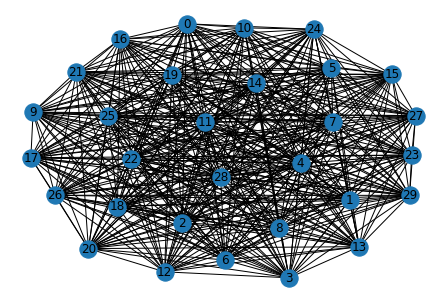

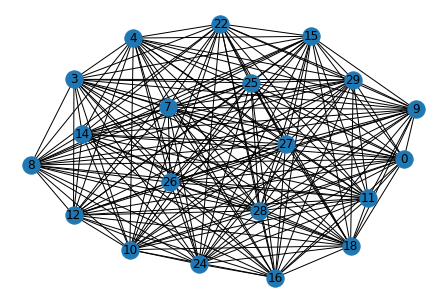

In [18]:
# INPUT VALUES
# G: networkx Graph
# n: number of deleted nodes
# 
# return G without deleted nodes

def random_attack(G,n):
    #your code here
    if n > G.number_of_nodes(): 
        print("Error")
        return None
    else:
        deleted_nodes = set()
        while len(deleted_nodes) < n:
            deleted_nodes = random.sample(G.nodes(),n)
            G = G.remove_nodes_from(deleted_nodes)
            return G


G = nx.erdos_renyi_graph(30,2) 
nx.draw(G, with_labels=True) 
plt.show() 

random_attack(G,10)
nx.draw(G, with_labels=True) 
plt.show() 




#### b) Targeted Attacks  (0.5 pts)

Implement a function that performs a targeted attack of deleting the $n$ highest-degree nodes on a given graph. Use the signature in the cell below.

100
[6, 5, 5, 5, 5, 5, 5, 4, 4, 4, 4, 4, 4, 4, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
(<networkx.classes.graph.Graph object at 0xa2ac96d90>, [5, 5, 5, 5, 6, 4, 5, 4, 5, 4])
97


/Users/sunwen/opt/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


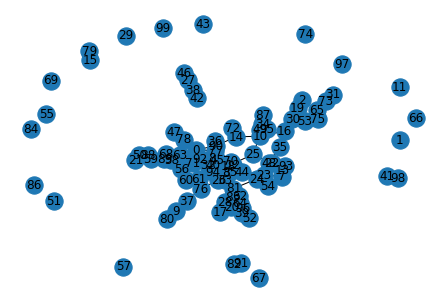

In [100]:
# INPUT VALUES
# G: networkx Graph
# n: number of deleted nodes
#
# return G without deleted nodes


def target_attack(G,n):
    # your code here
    if n > G.number_of_nodes(): 
        print("Error")
        return None
    else:
        deleted_nodes = set()
        highest_nodes = []
        degree_sequence = sorted([d for n, d in G.degree()], reverse=True)
        highest_nodes.extend(degree_sequence[:n])
        while len(deleted_nodes) < n+1:
            deleted_nodes = random.sample(highest_nodes,n)
            G.remove_nodes_from(deleted_nodes)
            return G, deleted_nodes

# G = nx.gnp_random_graph(30, 0.5)

Er_G = nx.erdos_renyi_graph(100,2/99) 
print(Er_G.number_of_nodes())
degree_sequence = sorted([d for n, d in Er_G.degree()], reverse=True)
# nx.draw(Er_G, with_labels=True) 
# plt.show() 
print(degree_sequence)

print(target_attack(Er_G, 10))
print(Er_G.number_of_nodes())
nx.draw(Er_G, with_labels=True) 
plt.show() 

#### c) Attacking Empirical and Random Graphs (1 pt)

Create an Erdos-Renyi and a Barabasi-Albert graph with 1000 nodes and average degree 2.

For both graphs and attack types, conduct 50 consecutive attacks of removing 10 nodes, and plot the number of removed nodes against the share of the biggest connected component in the graph. For each graph, include the curves of both attacks in the same plot. What do you observe?

[767, 755, 736, 728, 720, 692, 679, 668, 652, 630, 622, 605, 593, 537, 520, 509, 502, 493, 481, 441, 429, 418, 393, 390, 373, 304, 288, 280, 241, 227, 209, 202, 199, 195, 190, 180, 176, 155, 145, 129, 126, 125, 119, 108, 100, 95, 95, 94, 84, 84]
[10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200, 210, 220, 230, 240, 250, 260, 270, 280, 290, 300, 310, 320, 330, 340, 350, 360, 370, 380, 390, 400, 410, 420, 430, 440, 450, 460, 470, 480, 490, 500]
[84, 84, 84, 84, 84, 84, 84, 84, 84, 84, 84, 84, 84, 84, 84, 84, 84, 84, 84, 84, 84, 84, 84, 84, 84, 84, 84, 84, 84, 84, 84, 84, 84, 84, 84, 84, 84, 84, 84, 84, 84, 84, 84, 84, 84, 84, 84, 84, 84, 84]


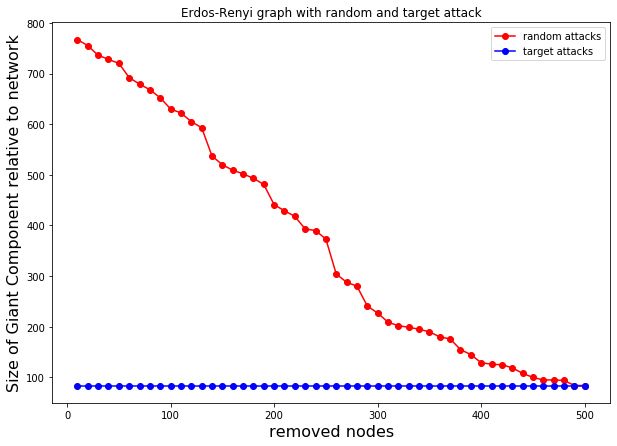

In [76]:
import numpy as np
import matplotlib.pyplot as plt

# Create Erdos-Renyi graph

Er_G = nx.erdos_renyi_graph(1000,2/999) 
# nx.draw(G, with_labels=True) 
# plt.show() 

count = 0
Max_CC_E1 = []
removed_nodes = 0
num_removed = []
while (count < 50):
    random_attack(Er_G,10)
    Len_CC_E1 = [len(c) for c in sorted(nx.connected_components(Er_G), key=len, reverse=True)][0]
    Max_CC_E1.extend([Len_CC_E1])
    count = count + 1
    removed_nodes = 10*count
    num_removed.extend([removed_nodes])
print(Max_CC_E1)
# print(num_removed)

count = 0
Max_CC_E2 = []
removed_nodes = 0
num_removed = []
while (count < 50):
    target_attack(Er_G,10)
    Len_CC_E2 = [len(c) for c in sorted(nx.connected_components(Er_G), key=len, reverse=True)][0]
    Max_CC_E2.extend([Len_CC_E2])
    count = count + 1
    removed_nodes = 10*count
    num_removed.extend([removed_nodes])
print(Max_CC_E2)

fig = plt.figure(figsize=(10,7))
plt.plot(num_removed, Max_CC_E1, '-o',color='red',label='random attacks')
plt.plot(num_removed, Max_CC_E2, '-o',color='blue',label='target attacks')
plt.xscale('linear')
plt.title("Erdos-Renyi graph with random and target attack")
plt.xlabel('removed nodes', fontsize=16)
plt.ylabel('Size of Giant Component relative to network', fontsize=16)
#sns.despine()

plt.legend()
plt.show()






/Users/sunwen/opt/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


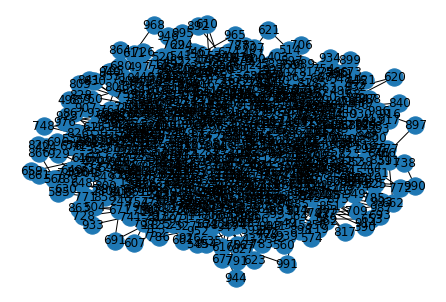

[990, 980, 970, 959, 949, 939, 928, 916, 905, 894, 884, 868, 858, 846, 834, 824, 811, 801, 791, 778, 765, 752, 742, 728, 711, 698, 687, 671, 656, 647, 634, 622, 614, 602, 588, 574, 560, 545, 531, 520, 505, 496, 479, 470, 456, 447, 428, 418, 407, 391]
[10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200, 210, 220, 230, 240, 250, 260, 270, 280, 290, 300, 310, 320, 330, 340, 350, 360, 370, 380, 390, 400, 410, 420, 430, 440, 450, 460, 470, 480, 490, 500]


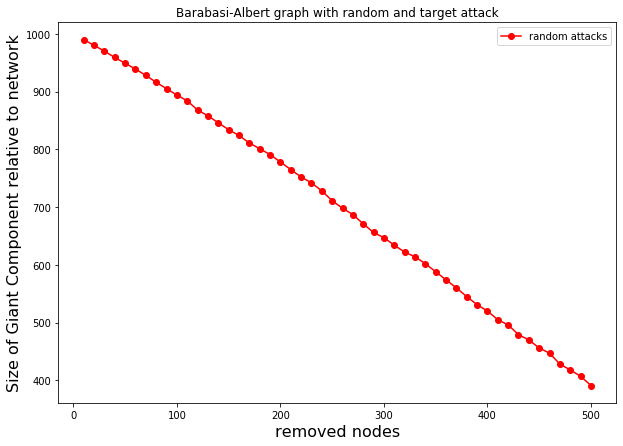

In [33]:
# Create Barabasi-Albert graph
n=1000
k = 2
Ba_G = nx.random_graphs.barabasi_albert_graph(n,k) 
nx.draw(Ba_G, with_labels=True) 
plt.show()

count = 0
Max_CC_B1 = []
removed_nodes = 0
num_removed = []
while (count < 50):
    random_attack(Ba_G,10)
    Len_CC_B1 = [len(c) for c in sorted(nx.connected_components(Ba_G), key=len, reverse=True)][0]
    Max_CC_B1.extend([Len_CC_B1])
    count = count + 1
    removed_nodes = 10*count
    num_removed.extend([removed_nodes])
print(Max_CC_B1)
print(num_removed)

fig = plt.figure(figsize=(10,7))
plt.plot(num_removed, Max_CC_B1, '-o',color='red',label='random attacks')
plt.xscale('linear')
plt.title("Barabasi-Albert graph with random and target attack")
plt.xlabel('removed nodes', fontsize=16)
plt.ylabel('Size of Giant Component relative to network', fontsize=16)
#sns.despine()

plt.legend()
plt.show()

###  Task 2: Schelling's Model of Segregation            (3 pts)

In this task we implement a simulation of Schelling's model of segregation.  
A concise explanation on how the model is specified as well as another simulation can, for instance, be found here:

http://nifty.stanford.edu/2014/mccown-schelling-model-segregation/

#### a) Grid creation (0.25 pts)
Using the signature in the cell below, write a function that returns a numpy array of the given shape (rows, columns). Cells with a red agent should be marked with the value 1, cells with a blue agent with value 2, empty cells with a 0.

In [ ]:
# INPUT VALUES:
# shape: integer tuple, shape of grid
# share_red: percent share of red nodes in the data
# share_blue: percent share of blue nodes in the data 
# -> note that blue+red shares should be <1 aas empty cell are needed


def create_grid (shape, share_red, share_blue):
    # your code here

#### b) Visualization (0.25 pts)

Write a function that takes a numpy grid and plots it. We recommend to use matplotlib for this

In [ ]:
# grid: 2D numpy array
def visualize(grid):
    # your code here

#### c) Simulating the model (1.5 pts)

Write a function that performs a full simulation of Schelling's model given a specific initial state, by performing steps until the maximum number of steps is reached or there was no change for the given amount of steps. Every n_viz steps, as well as at the very end, a visualization of the model should be plotted.
Use a model where in case that a particular agent is unhappy, he moves a to a randomly chosen vacant place.

In [ ]:
# INPUT VALUES: 
# grid: initial grid to start simulation with (2D numpy array)
# pp: preferred poportion of neighbors of own class
# n_max: maximum number of iteration steps
# no_changes_steps: number of simulation steps after which one has to stop if no change in the grid occurs
# n_viz: number of iteration steps after which current state is plotted

# RETURN:
# final_grid: 2D numpy array representing the grid at the end of your simulation

def simulate(grid, preferred_proportion, n_max, no_changes_steps, n_viz):
    # your code here
    return final_grid

#### d) Model Extension (1 pt)

Adaptt your functions such that they support multiple groups (instead of just red and blue), and each group can have a separate preferred proportion. Use the signatures from the cells below, where changes from the signatures in 2c) are explained.

In [ ]:
# shares: list of shares for each color, entries in return matrix from 0 (empty cell) to number of colors.
def create_grid_ext (shape, shares):
    # your code here

In [ ]:
# adapt color selection
def visualize_ext(grid):
# your code here

In [ ]:
# preferred_proportions: give a list of preferred proportions for each color
def simulate_ext(grid, preferred_proportion, max_steps, no_changes_steps, iterations_to_next_vizualization):
    # your coder here